In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [2]:
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.tokenize import regexp_tokenize

# 1. Regular expressions & word tokenization

## Introduction to regular expressions - Video

In [3]:
my_string = "Let's write RegEx!"
PATTERN = r"\w+" 
re.findall(PATTERN, my_string)

['Let', 's', 'write', 'RegEx']

### Practicing regular expressions: re.split() and re.findall()

Now you'll get a chance to write some regular expressions to match digits, strings and non-alphanumeric characters. Take a look at my_string first by printing it in the IPython Shell, to determine how you might best match the different steps.

Note: It's important to prefix your regex patterns with r to ensure that your patterns are interpreted in the way you want them to. Else, you may encounter problems to do with escape sequences in strings. For example, "/n" in Python is used to indicate a new line, but if you use the r prefix, it will be interpreted as "/n".

Instructions
 - Import the regular expression module re.
 - Split my_string on each sentence ending. To do this:
     - Write a pattern called sentence_endings to match sentence endings (., !, and ?).
     - Use re.split() to split my_string on the pattern and print the result.
 - Find all capitalized words in my_string by writing a pattern called capitalized_words and using re.findall(). Print the result.
 - Write a pattern called spaces to match spaces and then use re.split() to split my_string on this pattern, keeping all punctuation intact. Print the result.
 - Find all digits in my_string by writing a pattern called digits and using re.findall(). Print the result

In [4]:
my_string = "Let's write RegEx!  Won't that be fun?  I sure think so.  Can you find 4 sentences?  Or perhaps, all 19 words?"

In [6]:
# Import the regex module
import re

# Write a pattern to match sentence endings: sentence_endings
sentence_endings = r"[.!?]"

# Split my_string on sentence endings and print the result
print(re.split(sentence_endings, my_string))

# Find all capitalized words in my_string and print the result
capitalized_words = r"[A-Z]\w+"
print(re.findall(capitalized_words, my_string))

# Split my_string on spaces and print the result
spaces = r"\s+"
print(re.split(spaces, my_string))

# Find all digits in my_string and print the result
digits = r"\d+"
print(re.findall(digits, my_string))


["Let's write RegEx", "  Won't that be fun", '  I sure think so', '  Can you find 4 sentences', '  Or perhaps, all 19 words', '']
['Let', 'RegEx', 'Won', 'Can', 'Or']
["Let's", 'write', 'RegEx!', "Won't", 'that', 'be', 'fun?', 'I', 'sure', 'think', 'so.', 'Can', 'you', 'find', '4', 'sentences?', 'Or', 'perhaps,', 'all', '19', 'words?']
['4', '19']


In [8]:
capitalized_words = r"[A-Z][\w']+"
print(re.findall(capitalized_words, my_string))

["Let's", 'RegEx', "Won't", 'Can', 'Or']


## Introduction to tokenization - Video

In [2]:
scene_one = "SCENE 1: [wind] [clop clop clop] \nKING ARTHUR: Whoa there!  [clop clop clop] \nSOLDIER #1: Halt!  Who goes there?\nARTHUR: It is I, Arthur, son of Uther Pendragon, from the castle of Camelot.  King of the Britons, defeator of the Saxons, sovereign of all England!\nSOLDIER #1: Pull the other one!\nARTHUR: I am, ...  and this is my trusty servant Patsy.  We have ridden the length and breadth of the land in search of knights who will join me in my court at Camelot.  I must speak with your lord and master.\nSOLDIER #1: What?  Ridden on a horse?\nARTHUR: Yes!\nSOLDIER #1: You're using coconuts!\nARTHUR: What?\nSOLDIER #1: You've got two empty halves of coconut and you're bangin' 'em together.\nARTHUR: So?  We have ridden since the snows of winter covered this land, through the kingdom of Mercea, through--\nSOLDIER #1: Where'd you get the coconuts?\nARTHUR: We found them.\nSOLDIER #1: Found them?  In Mercea?  The coconut's tropical!\nARTHUR: What do you mean?\nSOLDIER #1: Well, this is a temperate zone.\nARTHUR: The swallow may fly south with the sun or the house martin or the plover may seek warmer climes in winter, yet these are not strangers to our land?\nSOLDIER #1: Are you suggesting coconuts migrate?\nARTHUR: Not at all.  They could be carried.\nSOLDIER #1: What?  A swallow carrying a coconut?\nARTHUR: It could grip it by the husk!\nSOLDIER #1: It's not a question of where he grips it!  It's a simple question of weight ratios!  A five ounce bird could not carry a one pound coconut.\nARTHUR: Well, it doesn't matter.  Will you go and tell your master that Arthur from the Court of Camelot is here.\nSOLDIER #1: Listen.  In order to maintain air-speed velocity, a swallow needs to beat its wings forty-three times every second, right?\nARTHUR: Please!\nSOLDIER #1: Am I right?\nARTHUR: I'm not interested!\nSOLDIER #2: It could be carried by an African swallow!\nSOLDIER #1: Oh, yeah, an African swallow maybe, but not a European swallow.  That's my point.\nSOLDIER #2: Oh, yeah, I agree with that.\nARTHUR: Will you ask your master if he wants to join my court at Camelot?!\nSOLDIER #1: But then of course a-- African swallows are non-migratory.\nSOLDIER #2: Oh, yeah...\nSOLDIER #1: So they couldn't bring a coconut back anyway...  [clop clop clop] \nSOLDIER #2: Wait a minute!  Supposing two swallows carried it together?\nSOLDIER #1: No, they'd have to have it on a line.\nSOLDIER #2: Well, simple!  They'd just use a strand of creeper!\nSOLDIER #1: What, held under the dorsal guiding feathers?\nSOLDIER #2: Well, why not?\n"

In [3]:
scene_one

"SCENE 1: [wind] [clop clop clop] \nKING ARTHUR: Whoa there!  [clop clop clop] \nSOLDIER #1: Halt!  Who goes there?\nARTHUR: It is I, Arthur, son of Uther Pendragon, from the castle of Camelot.  King of the Britons, defeator of the Saxons, sovereign of all England!\nSOLDIER #1: Pull the other one!\nARTHUR: I am, ...  and this is my trusty servant Patsy.  We have ridden the length and breadth of the land in search of knights who will join me in my court at Camelot.  I must speak with your lord and master.\nSOLDIER #1: What?  Ridden on a horse?\nARTHUR: Yes!\nSOLDIER #1: You're using coconuts!\nARTHUR: What?\nSOLDIER #1: You've got two empty halves of coconut and you're bangin' 'em together.\nARTHUR: So?  We have ridden since the snows of winter covered this land, through the kingdom of Mercea, through--\nSOLDIER #1: Where'd you get the coconuts?\nARTHUR: We found them.\nSOLDIER #1: Found them?  In Mercea?  The coconut's tropical!\nARTHUR: What do you mean?\nSOLDIER #1: Well, this is a t

### Word tokenization with NLTK

Here, you'll be using the first scene of Monty Python's Holy Grail, which has been pre-loaded as scene_one. You will have access to word_tokenize and sent_tokenize from the nltk.tokenize library. You can utilize them to tokenize both words and sentences from Python strings.

Instructions
 - Import the sent_tokenize and word_tokenize functions from nltk.tokenize.
 - Tokenize all the sentences in scene_one.
 - Tokenize the fourth sentence in sentences.
 - Find the unique tokens in the entire scene by using word_tokenize() on scene_one and then converting it into a set.
 - Print the unique tokens found. This has been done for you, so hit 'Submit Answer' to see the results!

In [4]:
# import sent_tokenize and word_tokenize from nltk.tokenize
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize

# Split scene_one into sentences: sentences
sentences = sent_tokenize(scene_one)

# Use word_tokenize to tokenize the fourth sentence: tokenized_sent
tokenized_sent = word_tokenize(sentences[3])

# Make a set of unique tokens in the entire scene: unique_tokens
unique_tokens = set(word_tokenize(scene_one))

# print the unique tokens result
print(unique_tokens)

{'who', 'Camelot', 'breadth', 'and', 'Ridden', 'am', "'em", 'second', 'got', 'minute', 'use', 'kingdom', 'under', 'may', 'speak', 'Who', 'south', 'wind', 'there', 'King', '...', 'they', 'bangin', 'Uther', 'Pull', 'That', 'all', 'these', 'you', 'swallows', 'wings', "'d", 'SCENE', 'Where', 'do', 'order', 'one', 'Am', 'A', 'them', 'are', 'he', 'European', 'master', 'carry', 'defeator', ':', 'needs', 'Supposing', 'In', 'Will', 'my', 'So', 'carried', 'pound', 'not', 'ratios', 'Found', 'sovereign', 'Please', 'yet', 'snows', 'Listen', 'in', '2', 'agree', 'ask', 'knights', 'house', '!', 'grips', 'weight', 'You', 'yeah', '1', 'on', 'KING', "n't", 'coconuts', 'through', 'maintain', 'Whoa', 'temperate', 'son', 'but', 'ridden', 'They', 'Arthur', "'s", ',', 'fly', 'servant', "'", 'search', 'our', 'interested', 'must', 'Are', 'Mercea', 'lord', 'line', 'creeper', 'where', 'clop', '[', 'using', 'It', 'empty', 'ARTHUR', 'is', 'suggesting', 'coconut', 'Yes', 'Court', 'here', 'have', 'climes', 'velocity'

### More regex with re.search()

In this exercise, you'll utilize re.search() and re.match() to find specific tokens. Both search and match expect regex patterns, similar to those you defined in an earlier exercise. You'll apply these regex library methods to the same Monty Python text from the nltk corpora.

You have both scene_one and sentences available from the last exercise; now you can use them with re.search() and re.match() to extract and match more text.

Instructions
 - Print the start and end indexes for the first occurence of the word "coconuts" in scene_one. To do this, first use re.search() to define match, and then use the .start() and .end() methods of match.
 - Write a regular expression called pattern1 to find anything in square brackets.
 - Use re.search() with the previous pattern to find the first text in square brackets in the scene.
 - Use re.match() to match the script notation in the fourth line (ARTHUR:) and print the result. The tokenized sentences of scene_one are available in your namespace as sentences.

In [11]:
sentences = ['SCENE 1: [wind] [clop clop clop] \nKING ARTHUR: Whoa there!',
 '[clop clop clop] \nSOLDIER #1: Halt!',
 'Who goes there?',
 'ARTHUR: It is I, Arthur, son of Uther Pendragon, from the castle of Camelot.',
 'King of the Britons, defeator of the Saxons, sovereign of all England!',
 'SOLDIER #1: Pull the other one!',
 'ARTHUR: I am, ...  and this is my trusty servant Patsy.',
 'We have ridden the length and breadth of the land in search of knights who will join me in my court at Camelot.',
 'I must speak with your lord and master.',
 'SOLDIER #1: What?',
 'Ridden on a horse?',
 'ARTHUR: Yes!',
 "SOLDIER #1: You're using coconuts!",
 'ARTHUR: What?',
 "SOLDIER #1: You've got two empty halves of coconut and you're bangin' 'em together.",
 'ARTHUR: So?',
 "We have ridden since the snows of winter covered this land, through the kingdom of Mercea, through--\nSOLDIER #1: Where'd you get the coconuts?",
 'ARTHUR: We found them.',
 'SOLDIER #1: Found them?',
 'In Mercea?',
 "The coconut's tropical!",
 'ARTHUR: What do you mean?',
 'SOLDIER #1: Well, this is a temperate zone.',
 'ARTHUR: The swallow may fly south with the sun or the house martin or the plover may seek warmer climes in winter, yet these are not strangers to our land?',
 'SOLDIER #1: Are you suggesting coconuts migrate?',
 'ARTHUR: Not at all.',
 'They could be carried.',
 'SOLDIER #1: What?',
 'A swallow carrying a coconut?',
 'ARTHUR: It could grip it by the husk!',
 "SOLDIER #1: It's not a question of where he grips it!",
 "It's a simple question of weight ratios!",
 'A five ounce bird could not carry a one pound coconut.',
 "ARTHUR: Well, it doesn't matter.",
 'Will you go and tell your master that Arthur from the Court of Camelot is here.',
 'SOLDIER #1: Listen.',
 'In order to maintain air-speed velocity, a swallow needs to beat its wings forty-three times every second, right?',
 'ARTHUR: Please!',
 'SOLDIER #1: Am I right?',
 "ARTHUR: I'm not interested!",
 'SOLDIER #2: It could be carried by an African swallow!',
 'SOLDIER #1: Oh, yeah, an African swallow maybe, but not a European swallow.',
 "That's my point.",
 'SOLDIER #2: Oh, yeah, I agree with that.',
 'ARTHUR: Will you ask your master if he wants to join my court at Camelot?!',
 'SOLDIER #1: But then of course a-- African swallows are non-migratory.',
 'SOLDIER #2: Oh, yeah...',
 "SOLDIER #1: So they couldn't bring a coconut back anyway...  [clop clop clop] \nSOLDIER #2: Wait a minute!",
 'Supposing two swallows carried it together?',
 "SOLDIER #1: No, they'd have to have it on a line.",
 'SOLDIER #2: Well, simple!',
 "They'd just use a strand of creeper!",
 'SOLDIER #1: What, held under the dorsal guiding feathers?',
 'SOLDIER #2: Well, why not?']

In [12]:
sentences

['SCENE 1: [wind] [clop clop clop] \nKING ARTHUR: Whoa there!',
 '[clop clop clop] \nSOLDIER #1: Halt!',
 'Who goes there?',
 'ARTHUR: It is I, Arthur, son of Uther Pendragon, from the castle of Camelot.',
 'King of the Britons, defeator of the Saxons, sovereign of all England!',
 'SOLDIER #1: Pull the other one!',
 'ARTHUR: I am, ...  and this is my trusty servant Patsy.',
 'We have ridden the length and breadth of the land in search of knights who will join me in my court at Camelot.',
 'I must speak with your lord and master.',
 'SOLDIER #1: What?',
 'Ridden on a horse?',
 'ARTHUR: Yes!',
 "SOLDIER #1: You're using coconuts!",
 'ARTHUR: What?',
 "SOLDIER #1: You've got two empty halves of coconut and you're bangin' 'em together.",
 'ARTHUR: So?',
 "We have ridden since the snows of winter covered this land, through the kingdom of Mercea, through--\nSOLDIER #1: Where'd you get the coconuts?",
 'ARTHUR: We found them.',
 'SOLDIER #1: Found them?',
 'In Mercea?',
 "The coconut's tropic

### More regex with re.search()

In this exercise, you'll utilize re.search() and re.match() to find specific tokens. Both search and match expect regex patterns, similar to those you defined in an earlier exercise. You'll apply these regex library methods to the same Monty Python text from the nltk corpora.

You have both scene_one and sentences available from the last exercise; now you can use them with re.search() and re.match() to extract and match more text.

Instructions
 - Print the start and end indexes for the first occurence of the word "coconuts" in scene_one. To do this, first use re.search() to define match, and then use the .start() and .end() methods of match.
 - Write a regular expression called pattern1 to find anything in square brackets.
 - Use re.search() with the previous pattern to find the first text in square brackets in the scene.
 - Use re.match() to match the script notation in the fourth line (ARTHUR:) and print the result. The tokenized sentences of scene_one are available in your namespace as sentences.


In [13]:
# Search for the first occurrence of "coconuts" in scene_one: match
match = re.search("coconuts", scene_one)

# Print the start and end indexes of match
print(match.start(), match.end())

# Write a regular expression to search for anything in square brackets: pattern1
pattern1 = r"\[.*\]"

# Use re.search to find the first text in square brackets
re.search(pattern1, scene_one)

# Find the script notation at the beginning of the fourth sentence and print it
pattern2 = r"[\w\s]+:"
print(re.match(pattern2, sentences[3]))

580 588
<_sre.SRE_Match object; span=(0, 7), match='ARTHUR:'>


Hint:
 - To create match, use re.search() with the arguments of interest - the word, followed by the scene. Once you've created match, you can use its  .start() and .end() methods inside a call to  print() to print the start and end indexes.
 - To create pattern1, use r"\[.*\]". You can then use it with scene_one in a call to re.search() to find the first text in square brackets.
 - To create pattern2, use r"[\w\s]+:". Then, you can use it with the fourth sentence (sentences[3]) in a call to re.match().

## Advanced tokenization with NLTK and regex - Video

### Choosing a tokenizer

Choosing a tokenizer
50xp
Given the following string, which is the best tokenizer? If possible, we want to retain sentence punctuation as separate tokens, but have '#1' remain a single token.

my_string = "SOLDIER #1: Found them? In Mercea? The coconut's tropical!"
Possible Answers
- r"\w+(\?!)"
- r"(\w+|#\d|\?|!)"
- r"(#\d\w+\?!)" (Correct)
- r"\s+"

In [2]:
my_string = "SOLDIER #1: Found them? In Mercea? The coconut's tropical!"

In [10]:
re.split(r"(#\d\w+\?!)", my_string)

["SOLDIER #1: Found them? In Mercea? The coconut's tropical!"]

### Regex with NLTK tokenization

Twitter is a frequently used source for NLP text and tasks. In this exercise, you'll build a more complex tokenizer for tweets with hashtags and mentions using nltk and regex. The nltk.tokenize.TweetTokenizer class gives you some extra methods and attributes for parsing tweets.

Here, you're given some example tweets to parse using both TweetTokenizer and regexp_tokenize from the nltk.tokenize module. These example tweets have been pre-loaded into the variable tweets. Feel free to explore it in the IPython Shell!

Remember: | is like an "or" statement in regex and square brackets can be used to create groups.

Instructions
 - Import the regexp_tokenize and TweetTokenizer from nltk.tokenize.
 - Define a regex pattern called pattern1 to match hashtags. A hashtag is something like #nlp. Then, call regexp_tokenize() with your new hashtag pattern on the first tweet in tweets.
 - Write a new pattern called pattern2 to match mentions and hashtags. A mention is something like @DataCamp. Then, call regexp_tokenize() with your new hashtag pattern on the last tweet in tweets. You can access the last element of a list using -1 as the index.
 - Create an instance of TweetTokenizer called tknzr and use it inside a list comprehension to tokenize each tweet into a new list called all_tokens. To do this, use the .tokenize() method of tknzr, with t as your iterator variable.

In [12]:
tweets=['This is the best #nlp exercise ive found online! #python',
 '#NLP is super fun! <3 #learning',
 'Thanks @datacamp :) #nlp #python']

In [13]:
tweets

['This is the best #nlp exercise ive found online! #python',
 '#NLP is super fun! <3 #learning',
 'Thanks @datacamp :) #nlp #python']

In [24]:
# Import the necessary modules
from nltk.tokenize import regexp_tokenize
from nltk.tokenize import TweetTokenizer

# Define a regex pattern to find hashtags: pattern1
pattern1 = r"#\w+"

# Use the pattern on the first tweet in the tweets list
regexp_tokenize(tweets[0],pattern1)

# Write a pattern that matches both mentions and hashtags
pattern2 = r"([#|@]\w+)"

# Use the pattern on the last tweet in the tweets list
regexp_tokenize(tweets[-1],pattern2)

# Use the TweetTokenizer to tokenize all tweets into one list
tknzr = TweetTokenizer()
all_tokens = [tknzr.tokenize(t) for t in tweets]
print(all_tokens)

In [25]:
# Define a regex pattern to find hashtags: pattern1
pattern1 = r"#\w+"

# Use the pattern on the first tweet in the tweets list
regexp_tokenize(tweets[0],pattern1)

['#nlp', '#python']

In [26]:
# Write a pattern that matches both mentions and hashtags
pattern2 = r"([#|@]\w+)"

# Use the pattern on the last tweet in the tweets list
regexp_tokenize(tweets[-1],pattern2)

['@datacamp', '#nlp', '#python']

In [27]:
# Use the TweetTokenizer to tokenize all tweets into one list
tknzr = TweetTokenizer()
all_tokens = [tknzr.tokenize(t) for t in tweets]

In [28]:
all_tokens

[['This',
  'is',
  'the',
  'best',
  '#nlp',
  'exercise',
  'ive',
  'found',
  'online',
  '!',
  '#python'],
 ['#NLP', 'is', 'super', 'fun', '!', '<3', '#learning'],
 ['Thanks', '@datacamp', ':)', '#nlp', '#python']]

Hint
You can import x from y using the command from y import x.
To create pattern1, use r"#\w+". Then, pass it in as the second argument to regexp_tokenize(), where the first argument is tweets[0].
To create pattern2, use r"([#|@]\w+)". After this, you can use it with regexp_tokenize() as you did above.
Use TweetTokenizer to create tknzr. Then, in the output expression of your list comprehension, use the .tokenize() method of tknzr. Be sure to use t as your iterator variable and tweets as your iterable.

In [29]:
#Other External Examples : 
tknzr = TweetTokenizer()
s0 = "This is a cooool #dummysmiley: :-) :-P <3 and some arrows < > -> <--"
tknzr.tokenize(s0)

['This',
 'is',
 'a',
 'cooool',
 '#dummysmiley',
 ':',
 ':-)',
 ':-P',
 '<3',
 'and',
 'some',
 'arrows',
 '<',
 '>',
 '->',
 '<--']

In [ ]:
http://www.nltk.org/api/nltk.tokenize.html

## Non-ascii tokenization

In this exercise, you'll practice advanced tokenization by tokenizing some non-ascii based text. You'll be using German with emoji!

Here, you have access to a string called german_text. Explore it in the Shell and notice the German characters and emoji!

The following modules have been pre-imported from nltk.tokenize: regexp_tokenize and word_tokenize.

Unicode ranges for emoji are:

('\U0001F300'-'\U0001F5FF'), ('\U0001F600-\U0001F64F'), ('\U0001F680-\U0001F6FF'), and ('\u2600'-\u26FF-\u2700-\u27BF').

Instructions
 - Tokenize all the words in german_text.
 - Tokenize only the capital words in german_text.
 - First, write a pattern called capital_words to match only capital words.
 - Then, tokenize it using regexp_tokenize(). Make sure to check for the German Ü!
 - Tokenize only the emoji in german_text. To write the pattern, refer to the unicode ranges for emoji given in the assignment text, using | to separate them. You can then tokenize it using regexp_tokenize().

In [30]:
german_text='Wann gehen wir zum Pizza? 🍕 Und fährst du mit Über? 🚕'

Hint
You can use word_tokenize() to tokenize the words in german_text.
The pattern to match only capital words is r"[A-ZÜ]\w+".
    To write the pattern to match emoji, separate the unicode ranges for emoji shown in the assignment text using |. After writing the patterns, be sure to tokenize using regexp_tokenize() and then print the results.

In [13]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import regexp_tokenize

In [38]:
# Tokenize the words in german_text
word_tokenize(german_text)

# Tokenize only capital words
capital_words = r"[A-ZÜ]\w+"
print(regexp_tokenize(german_text, capital_words))

# Tokenize only emoji
emoji = "['\U0001F300-\U0001F5FF'|'\U0001F600-\U0001F64F'|'\U0001F680-\U0001F6FF'|'\u2600-\u26FF\u2700-\u27BF']"
print(regexp_tokenize(german_text, emoji))

['Wann', 'Pizza', 'Und', 'Über']
['🍕', '🚕']


## Charting word length with NLTK - Video

### Charting practice

Try using your new skills to find and chart the number of words per line in the script using matplotlib. The Holy Grail script is loaded for you, and you need to use regex to find the words per line.

Using list comprehensions here will speed up your computations. For example: my_lines = [tokenize(l) for l in lines] will call a function tokenize on each line in the list lines. The new transformed list will be saved in the my_lines variable.

You have access to the entire script in the variable holy_grail. Go for it!

Instructions
- Split the script into lines using the newline ('\n') character.
- Use re.sub() inside a list comprehension to replace the prompts such as ARTHUR: and SOLDIER #1. The pattern has been written for you.
- Use a list comprehension to tokenize lines with regexp_tokenize(), keeping only words. Recall that the pattern for words is "\w+".
- Use a list comprehension to create a list of line lengths called line_num_words.
- Use t_line as your iterator variable to iterate over tokenized_lines, and then len() function to compute line lengths.
- Plot a histogram of line_num_words using plt.hist(). Don't forgot to use plt.show() as well to display the plot.
- Take Hint (-30xp)

In [54]:
with open('grail.txt', 'r') as content_file:
    holy_grail = content_file.read()

In [55]:
type(holy_grail)
holy_grail

"SCENE 1: [wind] [clop clop clop] \nKING ARTHUR: Whoa there!  [clop clop clop] \nSOLDIER #1: Halt!  Who goes there?\nARTHUR: It is I, Arthur, son of Uther Pendragon, from the castle of Camelot.  King of the Britons, defeator of the Saxons, sovereign of all England!\nSOLDIER #1: Pull the other one!\nARTHUR: I am, ...  and this is my trusty servant Patsy.  We have ridden the length and breadth of the land in search of knights who will join me in my court at Camelot.  I must speak with your lord and master.\nSOLDIER #1: What?  Ridden on a horse?\nARTHUR: Yes!\nSOLDIER #1: You're using coconuts!\nARTHUR: What?\nSOLDIER #1: You've got two empty halves of coconut and you're bangin' 'em together.\nARTHUR: So?  We have ridden since the snows of winter covered this land, through the kingdom of Mercea, through--\nSOLDIER #1: Where'd you get the coconuts?\nARTHUR: We found them.\nSOLDIER #1: Found them?  In Mercea?  The coconut's tropical!\nARTHUR: What do you mean?\nSOLDIER #1: Well, this is a t

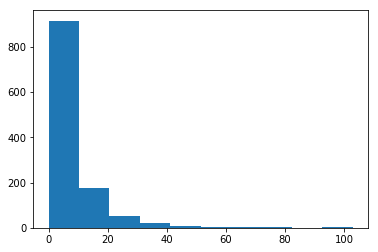

In [52]:
# Split the script into lines: lines
lines = holy_grail.split('\n')

# Replace all script lines for speaker
pattern = "[A-Z]{2,}(\s)?(#\d)?([A-Z]{2,})?:"
lines = [re.sub(pattern, '', l) for l in lines]

# Tokenize each line: tokenized_lines
tokenized_lines = [regexp_tokenize(s, r'\w+') for s in lines]

# Make a frequency list of lengths: line_num_words
line_num_words = [len(t_line) for t_line in tokenized_lines]

# Plot a histogram of the line lengths
plt.hist(line_num_words)

# Show the plot
plt.show()

In [53]:
lines[1:4]

[' Whoa there!  [clop clop clop] ',
 ' Halt!  Who goes there?',
 ' It is I, Arthur, son of Uther Pendragon, from the castle of Camelot.  King of the Britons, defeator of the Saxons, sovereign of all England!']

# 2. Simple topic identification

## Word counts with bag-of-words - Video

### Bag-of-words picker

It's time for a quick check on your understanding of bag-of-words. Which of the below options, with basic nltk tokenization, map the bag-of-words for the following text?

"The cat is in the box. The cat box."

Possible Answers
- ('the', 3), ('box.', 2), ('cat', 2), ('is', 1)
- ('The', 3), ('box', 2), ('cat', 2), ('is', 1), ('in', 1), ('.', 1)
- ('the', 3), ('cat box', 1), ('cat', 1), ('box', 1), ('is', 1), ('in', 1)
- ('The', 2), ('box', 2), ('.', 2), ('cat', 2), ('is', 1), ('in', 1), ('the', 1) (Correct)

In [2]:
import pandas as pd

In [3]:
# article = pd.read_table("article.txt")
# article = str(article)

with open('article.txt', 'r') as content_file:
    article = content_file.read()

In [90]:
article

'\'\\\'\\\'\\\'Debugging\\\'\\\'\\\' is the process of finding and resolving of defects that prevent correct operation of computer software or a system.  \\n\\nNumerous books have been written about debugging (see below: #Further reading|Further reading), as it involves numerous aspects, including interactive debugging, control flow, integration testing, Logfile|log files, monitoring (Application monitoring|application, System Monitoring|system), memory dumps, Profiling (computer programming)|profiling, Statistical Process Control, and special design tactics to improve detection while simplifying changes.\\n\\nOrigin\\nA computer log entry from the Mark&nbsp;II, with a moth taped to the page\\n\\nThe terms "bug" and "debugging" are popularly attributed to Admiral Grace Hopper in the 1940s.[http://foldoc.org/Grace+Hopper Grace Hopper]  from FOLDOC While she was working on a Harvard Mark II|Mark II Computer at Harvard University, her associates discovered a moth stuck in a relay and ther

In [91]:
type(article)

str

### Building a Counter with bag-of-words

In this exercise, you'll build your first (in this course) bag-of-words counter using a Wikipedia article, which has been pre-loaded as article. Try doing the bag-of-words without looking at the full article text, and guessing what the topic is! If you'd like to peek at the title at the end, we've included it as article_title. Note that this article text has had very little preprocessing from the raw Wikipedia database entry.

word_tokenize has been imported for you.

Instructions
- Import Counter from collections.
- Use word_tokenize() to split the article into tokens.
- Use a list comprehension with t as the iterator variable to convert all the tokens into lowercase. The .lower() method converts text into lowercase.
- Create a bag-of-words counter called bow_simple by using Counter() with lower_tokens as the argument.
- Use the .most_common() method of bow_simple to print the 10 most common tokens.

In [4]:
# Import Counter
from collections import Counter

# Tokenize the article: tokens
tokens = word_tokenize(article)

# Convert the tokens into lowercase: lower_tokens
lower_tokens = [t.lower() for t in tokens]

# Create a Counter with the lowercase tokens: bow_simple
bow_simple = Counter(lower_tokens)

# Print the 10 most common tokens
print(bow_simple.most_common(10))

[(',', 151), ('the', 147), ('of', 81), ('.', 70), ('to', 61), ('a', 59), ("''", 42), ('and', 41), ('in', 41), ('(', 40)]


## Simple text preprocessing - Video

### Text preprocessing steps

Which of the following are useful text preprocessing steps?

Possible Answers
- Stems, spelling corrections, lowercase.
- Lemmatization, lowercasing, removing unwanted tokens. (Correct)
- Removing stop words, leaving in capital words.
- Strip stop words, word endings and digits.

### Text preprocessing practice

Now, it's your turn to apply the techniques you've learned to help clean up text for better NLP results. You'll need to remove stop words and non-alphabetic characters, lemmatize, and perform a new bag-of-words on your cleaned text.

You start with the same tokens you created in the last exercise: lower_tokens. You also have the Counter class imported.

Instructions
- Import the WordNetLemmatizer class from nltk.stem.
- Create a list called alpha_only that iterates through lower_tokens and retains only alphabetical characters. You can use the .isalpha() method to check for this.
- Create another list called no_stops in which you remove all stop words, which are held in a list called english_stops.
- Initialize a WordNetLemmatizer object called wordnet_lemmatizer and use its .lemmatize() method on the tokens in no_stops to create a new list called lemmatized.
- Finally, create a new Counter called bow with the lemmatized words and show the 10 most common tokens.

In [5]:
# english_stops = pd.read_table("english_stopwords.txt")
# #english_stops
# english_stops = str(english_stops)
#Read the file english_stopwords.txt
with open('english_stopwords.txt', 'r') as content_file:
    english_stops = content_file.read()

In [6]:
type(english_stops)

str

In [7]:
# Import WordNetLemmatizer
from nltk.stem import WordNetLemmatizer

# Retain alphabetic words: alpha_only
alpha_only = [t for t in lower_tokens if t.isalpha()]

# Remove all stop words: no_stops
no_stops = [t for t in alpha_only if t not in english_stops]

# Instantiate the WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

# Lemmatize all tokens into a new list: lemmatized
lemmatized = [wordnet_lemmatizer.lemmatize(t) for t in no_stops]

# Create the bag-of-words: bow
bow = Counter(lemmatized)

# Print the 10 most common tokens
print(bow.most_common(10))
               

[('debugging', 30), ('system', 23), ('software', 16), ('computer', 14), ('bug', 14), ('problem', 14), ('term', 13), ('tool', 13), ('process', 12), ('used', 12)]


In [15]:
# Import WordNetLemmatizer
from nltk.stem import WordNetLemmatizer

In [78]:
# Retain alphabetic words: alpha_only
alpha_only = [t for t in lower_tokens if t.isalpha()]

In [79]:
# Remove all stop words: no_stops
no_stops = [t for t in alpha_only if t not in english_stops]

In [25]:
x = [2,4,6,8,10,12]
y = [3,6,9,12]
z = [t for t in x if t not in y]
z

[2, 4, 8, 10]

In [26]:
x = ["two", "four", "six", "eight", "ten", "twelve"]
y = ["three","six", "nine", "twelve"]
[t for t in x if t not in y]

['two', 'four', 'eight', 'ten']

## Introduction to gensim - Video

In [130]:
my_documents = ['The movie was about a spaceship and aliens.',
'I really liked the movie!',
'Awesome action scenes, but boring characters.',
'The movie was awful! I hate alien films.',
'Space is cool! I liked the movie.',
'More space films, please!',]

tokenized_docs = [word_tokenize(doc.lower()) for doc in my_documents]
# tokenized_docs
dictionary = Dictionary(tokenized_docs)
#ictionary
dictionary.token2id

{'!': 12,
 ',': 16,
 '.': 8,
 'a': 4,
 'about': 3,
 'action': 14,
 'alien': 22,
 'aliens': 7,
 'and': 6,
 'awesome': 13,
 'awful': 20,
 'boring': 18,
 'but': 17,
 'characters': 19,
 'cool': 26,
 'films': 23,
 'hate': 21,
 'i': 9,
 'is': 25,
 'liked': 11,
 'more': 27,
 'movie': 1,
 'please': 28,
 'really': 10,
 'scenes': 15,
 'space': 24,
 'spaceship': 5,
 'the': 0,
 'was': 2}

In [131]:
corpus = [dictionary.doc2bow(doc) for doc in tokenized_docs]
corpus

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1)],
 [(0, 1), (1, 1), (9, 1), (10, 1), (11, 1), (12, 1)],
 [(8, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1)],
 [(0, 1),
  (1, 1),
  (2, 1),
  (8, 1),
  (9, 1),
  (12, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1)],
 [(0, 1), (1, 1), (8, 1), (9, 1), (11, 1), (12, 1), (24, 1), (25, 1), (26, 1)],
 [(12, 1), (16, 1), (23, 1), (24, 1), (27, 1), (28, 1)]]

What are word vectors?

What are word vectors and how do they help with NLP?

Possible Answers
Click or Press Ctrl+1 to focus
 - They are similar to bags of words, just with numbers. You use them to count how many tokens there are.
 - Word vectors are sparse arrays representing bigrams in the corpora. You can use them to compare two sets of words to one another.
 - Word vectors are multi-dimensional mathematical representations of words created using deep learning methods. They give us insight into relationships between words in a corpus. (Correct)
 - Word vectors don't actually help NLP and are just hype.

### Creating and querying a corpus with gensim

It's time to apply the methods you learned in the previous video to create your first gensim dictionary and corpus!

You'll use these data structures to investigate word trends and potential interesting topics in your document set. To get started, we have imported a few additional messy articles from Wikipedia, which were preprocessed by lowercasing all words, tokenizing them, and removing stop words and punctuation. These were then stored in a list of document tokens called articles. You'll need to do some light preprocessing and then generate the gensim dictionary and corpus.

Instructions
- Import Dictionary from gensim.corpora.dictionary.
- Initialize a gensim Dictionary with the tokens in articles.
- Obtain the id for "computer" from dictionary. To do this, use its .token2id method which returns ids from text, and then chain .get() which returns tokens from ids. Pass in "computer" as an argument to .get().
- Use a list comprehension in which you iterate over articles to create a gensim MmCorpus from dictionary.
- In the output expression, use the .doc2bow() method on dictionary with article as the argument.
- Print the first 10 word ids with their frequency counts from the fifth document. This has been done for you, so hit 'Submit Answer' to see the results!

In [2]:
# My Code - to extract data from txt files in Wikipedia articles folder
import glob
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Write the pattern: pattern
pattern = 'Wikipedia articles/wiki_text*.txt'

# Save all file matches: csv_files
txt_files = glob.glob(pattern)
txt_files

read_files = []
for txt in txt_files:

    with open(txt, 'r', encoding="utf8") as content_file:
        read_files.append(content_file.read())

articles = []
for files in read_files:
    tokens = [w for w in word_tokenize(files.lower()) if w.isalpha()]
    no_stops = [t for t in tokens if t not in stopwords.words('english')]
    articles.append(no_stops)


In [4]:
# 30 words in the first document list in articles list
articles[1][1:30]

['system',
 'disambiguation',
 'computer',
 'div',
 'nowrap',
 'file',
 'acer',
 'aspire',
 'gemstone',
 'columbia',
 'supercomputer',
 'nasa',
 'advanced',
 'supercomputing',
 'intertec',
 'br',
 'thinking',
 'machines',
 'connection',
 'machine',
 'frostburg',
 'supplying',
 'wikipedia',
 'via',
 'gigabit',
 'lange',
 'nacht',
 'der',
 'wissenschaften']

In [10]:
# Import Dictionary
from gensim.corpora.dictionary import Dictionary

# Create a Dictionary from the articles: dictionary
dictionary = Dictionary(articles)

# Select the id for "computer": computer_id
computer_id = dictionary.token2id.get("computer")

# Use computer_id with the dictionary to print the word
print(dictionary.get(computer_id))

# Create a MmCorpus: corpus
corpus = [dictionary.doc2bow(article) for article in articles]

# Print the first 10 word ids with their frequency counts from the fifth document
print(corpus[4][:10])

computer
[(2, 3), (4, 5), (5, 11), (7, 4), (9, 16), (11, 12), (13, 1), (16, 12), (17, 10), (22, 2)]


### Gensim bag-of-words

Now, you'll use your new gensim corpus and dictionary to see the most common terms per document and across all documents. You can use your dictionary to look up the terms. Take a guess at what the topics are and feel free to explore more documents in the IPython Shell!

You have access to the dictionary and corpus objects you created in the previous exercise, as well as the Python defaultdict and itertools to help with the creation of intermediate data structures for analysis.

The fifth document from corpus is stored in the variable doc, which has been sorted in descending order.

Instructions
- Print the top five words of bow_doc using each word_id with the dictionary alongside word_count. The word_id can be accessed using the .get() method of dictionary.
- Create a defaultdict called total_word_count in which the keys are all the token ids (word_id) and the values are the sum of their occurrence across all documents (word_count). Remember to specify int when creating the defaultdict, and inside the for loop, increment each word_id of total_word_count by word_count.
- Create a sorted list from the defaultdict, using words across the entire corpus. To achieve this, use the .items() method on total_word_count inside sorted().
- Similar to how you printed the top five words of bow_doc earlier, print the top five words of sorted_word_count as well as the number of occurrences of each word across all the documents.

In [13]:
from collections import defaultdict
import itertools

In [14]:
# Save the fifth document: doc
doc = corpus[4]

# Sort the doc for frequency: bow_doc
bow_doc = sorted(doc, key=lambda w: w[1], reverse=True)

# Print the top 5 words of the document alongside the count
for word_id, word_count in bow_doc[:5]:
     #print(word_id, word_count)
    print(dictionary.get(word_id), word_count)
    
# Create the defaultdict: total_word_count
total_word_count = defaultdict(int)
for word_id, word_count in itertools.chain.from_iterable(corpus):
    total_word_count[word_id] += word_count

# Create a sorted list from the defaultdict: sorted_word_count
sorted_word_count = sorted(total_word_count.items(), key=lambda w: w[1], reverse=True) 

# Print the top 5 words across all documents alongside the count
for word_id, word_count in sorted_word_count[:5]:
    print(dictionary.get(word_id), word_count)

debugging 40
system 19
software 16
tools 14
process 12
computer 594
software 450
cite 322
ref 259
code 234


## Tf-idf with gensim - Video

### What is tf-idf?


You want to calculate the tf-idf weight for the word "computer", which appears five times in a document containing 100 words. Given a corpus containing 200 documents, with 20 documents mentioning the word "computer", tf-idf can be calculated by multiplying term frequency with inverse document frequency.

Term frequency = percentage share of the word compared to all tokens in the document Inverse document frequency = logarithm of the total number of documents in a corpora divided by the number of documents containing the term

Which of the below options is correct?
Possible Answers

 - (5 / 100) * log(200 / 20) (Correct)
 - (5 * 100) / log(200 * 20)
 - (20 / 5) * log(200 / 20)
 - (200 * 5) * log(400 / 5)
    

 

### Tf-idf with Wikipedia


Now it's your turn to determine new significant terms for your corpus by applying gensim's tf-idf. You will again have access to the same corpus and dictionary objects you created in the previous exercises - dictionary, corpus, and doc. Will tf-idf make for more interesting results on the document level?
Instructions

 - Import TfidfModel from gensim.models.tfidfmodel.
 - Initialize a new TfidfModel called tfidf using corpus.
 - Use doc to calculate the weights. You can do this by passing [doc] to tfidf.
 - Print the first five term ids with weights.
 - Sort the term ids and weights in a new list from highest to lowest weight. This has been done for you.
 - Print the top five weighted words (term_id) from sorted_tfidf_weights along with their weighted score (weight).


In [16]:
# Import TfidfModel
from gensim.models.tfidfmodel import TfidfModel

# Create a new TfidfModel using the corpus: tfidf
tfidf = TfidfModel(corpus)

# Calculate the tfidf weights of doc: tfidf_weights
tfidf_weights = tfidf[doc]

# Print the first five weights
print(tfidf_weights[0:5])

# Sort the weights from highest to lowest: sorted_tfidf_weights
sorted_tfidf_weights = sorted(tfidf_weights, key=lambda w: w[1], reverse=True)

# Print the top 5 weighted words
for term_id, weight in sorted_tfidf_weights[:5]:
    print(dictionary.get(term_id), weight)

[(2, 0.022197157026523636), (4, 0.007939052212344833), (5, 0.057746823002805925), (11, 0.03992471997759224), (13, 0.02004781586642236)]
wolf 0.22672671457458993
debugging 0.20998844728293067
fence 0.18138137165967194
tron 0.13603602874475396
squeeze 0.13603602874475396


# 3. Named Entity Recognition

This chapter will introduce a slightly more advanced topic - Named-entity recognition. You'll learn how to identify the who, what and where of your texts using pre-trained models on English and non-English text. You'll also learn how to use some new libraries - polyglot and spaCy - to add to your NLP toolbox.

## Named Entity Recognition - Video

### NER with NLTK

You're now going to have some fun with named-entity recognition! A scraped news article has been pre-loaded into your workspace. Your task is to use nltk to find the named entities in this article.

What might the article be about, given the names you found?

Along with nltk, sent_tokenize and word_tokenize from nltk.tokenize have been pre-imported.
Instructions

  - Tokenize article into sentences.
  - Tokenize each sentence in sentences into words using a list comprehension.
  - Inside a list comprehension, tag each tokenized sentence into parts of speech using nltk.pos_tag().
  - Chunk each tagged sentence into named-entity chunks using nltk.ne_chunk_sents(). Along with pos_sentences, specify the additional keyword argument binary=True.
  - Loop over each sentence and each chunk, and test whether it is a named-entity chunk by testing if it has the attribute label, and if the chunk.label() is equal to "NE". If so, print that chunk.


Correct Solution is below:

In [ ]:
# Tokenize the article into sentences: sentences
sentences = nltk.sent_tokenize(article)

# Tokenize each sentence into words: token_sentences
token_sentences = [nltk.word_tokenize(sent) for sent in sentences]

# Tag each tokenized sentence into parts of speech: pos_sentences
pos_sentences = [nltk.pos_tag(sent) for sent in token_sentences] 

# Create the named entity chunks: chunked_sentences
chunked_sentences = nltk.ne_chunk_sents(pos_sentences, binary=True)

# Test for stems of the tree with 'NE' tags
for sent in chunked_sentences:
    for chunk in sent:
        if hasattr(chunk, "label") and chunk.label() == "NE":
            print(chunk)

In [18]:
?nltk.ne_chunk_sents

Object `nltk.ne_chunk_sents` not found.


### Charting practice

In this exercise, you'll use some extracted named entities and their groupings from a series of newspaper articles to chart the diversity of named entity types in the articles.

You'll use a defaultdict called ner_categories, with keys representing every named entity group type, and values to count the number of each different named entity type. You have a chunked sentence list called chunked_sentences similar to the last exercise, but this time with non-binary category names.

You can use hasattr() to determine if each chunk has a 'label' and then simply use the chunk's .label() method as the dictionary key.
Instructions

  - Create a defaultdict called ner_categories, with the default type set to int.
  - Fill up the dictionary with values for each of the keys. Remember, the keys will represent the label().
      - In the outer for loop, iterate over chunked_sentences, using sent as your iterator variable.
      - In the inner for loop, iterate over sent. If the condition is true, increment the value of each key by 1.
  - For the pie chart labels, create a list called labels from the keys of ner_categories, which can be accessed using .keys().
  - Use a list comprehension to create a list called values, using the .get() method on ner_categories to compute the values of each label l.
  - Use plt.pie() to create a pie chart for each of the NER categories. Along with values and labels=labels, pass the extra keyword arguments autopct='%1.1f%%' and startangle=140 to add percentages to the chart and rotate the initial start angle.
  - Display your pie chart. Was the distribution what you expected?


In [ ]:
# Create the defaultdict: ner_categories
ner_categories = defaultdict(int)

# Create the nested for loop
for sent in chunked_sentences:
    for chunk in sent:
        if hasattr(chunk, 'label'):
            ner_categories[chunk.label()] += 1
            
# Create a list from the dictionary keys for the chart labels: labels
labels = list(ner_categories.keys())

# Create a list of the values: values
values = [ner_categories.get(l) for l in labels]

# Create the pie chart
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)

# Display the chart
plt.show()
    

### Stanford library with NLTK


When using the Stanford library with NLTK, what is needed to get started?
Possible Answers

    - A normal installation of NLTK.
    - An installation of the Stanford Java Library.
    - Both NLTK and an installation of the Stanford Java Library.
    - NLTK, the Standford Java Libraries and some environment variables to help with integration. (Correct)


### Comparing NLTK with spaCy NER


Using the same text you used in the first exercise of this chapter, you'll now see the results using spaCy's NER annotator. How will they compare?

The article has been pre-loaded as article. To minimize execution times, you'll be asked to specify the keyword arguments tagger=False, parser=False, matcher=False when loading the spaCy model, because you only care about the entity in this exercise.
Instructions

   - Import spacy.
   - Load the 'en' model using spacy.load(). Specify the additional keyword arguments tagger=False, parser=False, matcher=False.
   - Create a spacy document object by passing article into nlp().
   - Using ent as your iterator variable, iterate over the entities of doc and print out the labels (ent.label_) and text (ent.text).


Hint

    Use the import keyword to import the module of interest.
    Pass in 'en' to spacy.load(), along with the other keyword arguments specified in the instructions.
    Use nlp(article) to create doc.
    Iterate over doc.ents, printing the .label_ and .text attributes (in that order) of ent.


In [ ]:
# Import spacy
import spacy

# Instantiate the English model: nlp
nlp = spacy.load('en', tagger=False, parser=False, matcher=False)

# Create a new document: doc
doc = nlp(article)

# Print all of the found entities and their labels
for ent in doc.ents:
    print(ent.label_, ent.text)

### spaCy NER Categories

Which are the extra categories that spacy uses compared to nltk in its named-entity recognition?
Possible Answers

    - GPE, PERSON, MONEY
    - ORGANIZATION, WORKOFART
    - NORP, CARDINAL, MONEY, WORKOFART, LANGUAGE, EVENT (Correct)
    - EVENT_LOCATION, FIGURE

## Multilingual NER with polyglot - Video

### French NER with polyglot I


In this exercise and the next, you'll use the polyglot library to identify French entities. The library functions slightly differently than spacy, so you'll use a few of the new things you learned in the last video to display the named entity text and category.

You have access to the full article string in article. Additionally, the Text class of polyglot has been imported from polyglot.text.
Instructions

     - Create a new Text object called txt.
     - Iterate over txt.entities and print each entity, ent.
     - Print the type of each entity.


In [ ]:
# Create a new text object using Polyglot's Text class: txt
txt = Text(article)

# Print each of the entities found
for ent in txt.entities:
    print(ent)
    
# Print the type of each entity
print(type(ent))

## French NER with polyglot II

Here, you'll complete the work you began in the previous exercise. Your code from there has already been executed, as you can see from the output in the IPython Shell.

Your task is to use a list comprehension to create a list of tuples, in which the first element is the entity tag, and the second element is the full string of the entity text.
Instructions

   - Use a list comprehension to create a list of tuples called entities.
       - The output expression of your list comprehension should be a tuple. Remember to use () to create the tuple.
          -  The first element of each tuple is the entity tag, which you can access using its .tag attribute.
           - The second element is the full string of the entity text, which you can access using ' '.join(ent).
       - Your iterator variable should be ent, and you should iterate over all of the entities of the polyglot Text object, txt.


In [ ]:
# Create the list of tuples: entities
entities = [(ent.tag, ' '.join(ent)) for ent in txt.entities]

# Print the entities
print(entities)


### Spanish NER with polyglot


You'll continue your exploration of polyglot now with some Spanish annotation. This article is not written by a newspaper, so it is your first example of a more blog-like text. How do you think that might compare when finding entities?

The Text object has been created as txt, and each entity has been printed, as you can see in the IPython Shell.

Your specific task is to determine how many of the entities contain the words "Márquez" or "Gabo" - these refer to the same person in different ways!
Instructions

    - Iterate over all of the entities of txt, using ent as your iterator variable.
    - Check whether the entity contains "Márquez" or "Gabo". If it does, increment count.
    - Hit 'Submit Answer' to see what percentage of entities refer to Gabriel García Márquez (aka Gabo).


In [19]:
"alex" in ["alex", "martin"]

True

In [ ]:
# Initialize the count variable: count
count = 0

# Iterate over all the entities
for ent in txt.entities:
    # Check whether the entity contains 'Márquez' or 'Gabo'
    if "Márquez" in ent or "Gabo" in ent:
        # Increment count
        count += 1

# Print count
print(count)

# Calculate the percentage of entities that refer to "Gabo": percentage
percentage = count * 1.0 / len(txt.entities)

### NER via ensemble model


In the final exercise of this NER chapter, you'll use the spacy and polyglot models to extract the best entities possible from English text. Here, you'll be using a long Medium post with a mixture of more formal article writing and informal. You'll find entities using both spacy and polyglot and choose only entities identified by both to create a sort of ensemble model.

In this exercise, you have access to the polyglot Text class and the loaded english vectors for spacy in nlp. You also have the article text in article. The set of polyglot entities have been computed and are available in poly_ents. Your task is to compute the spacy entities and then find the intersection between the polyglot entities and the spacy entities.

Here, you'll be working with sets. A set comprehension looks exactly like a list comprehension, with the exception that it uses the set syntax markers {}.
Instructions

     - Use a set comprehension to create a set of spacy entities, keeping only the text. The document object is available as doc. The text can be accessed using the .text attribute of each entity.
     - Use the set method .intersection() to find the entities that are in both spacy_ents and poly_ents.
     - Calculate the number of entities not included in the new ensemble set of entities. You can do this by calculating the length of the union of spacy_ents and poly_ents (which can be computed using the .union() method) and then subtracting the length of ensemble_ents.


Hint

    The output expression of your set comprehension should be e.text. You can iterate over all the entities in doc using doc.ents.
    Use the .intersection() method on spacy_ents with poly_ents as the argument to find the common entities.
    To calculate num_left_out, first calculate the union of spacy_ents and poly_ents, using the .union() method. Then calculate its length using len(), and subtract the length of ensemble_ents from it.


In [ ]:
# Create a set of spaCy entities keeping only their text: spacy_ents
spacy_ents = {e.text for e in doc.ents} 

# Create a set of the intersection between the spacy and polyglot entities: ensemble_ents
ensemble_ents = spacy_ents.intersection(poly_ents)

# Print the common entities
print(ensemble_ents)

# Calculate the number of entities not included in the new ensemble set of entities: num_left_out
num_left_out = len(spacy_ents.union(poly_ents)) - len(ensemble_ents)
print(num_left_out)


### Which possible features?


Which of the following are possible features for a text classification problem?
Possible Answers

    Number of words in a document.
    1
    Specific named entities.
    2
    Language.
    3
    All of the above. (Correct)
    4

    Take Hint (-15xp)

### Training and testing


What datasets are needed for supervised learning?
Possible Answers

    Training data.
    1
    Testing data.
    2
    Both training and testing data. (Correct)
    3
    A label or outcome.
    4

    Take Hint (-15xp)

## Building word count vectors with scikit-learn - Video

## CountVectorizer for text classification

It's time to begin building your text classifier! The data has been loaded into a DataFrame called df. Explore it in the IPython Shell to investigate what columns you can use. The .head() method is particularly informative.

In this exercise, you'll use pandas alongside scikit-learn to create a sparse text vectorizer you can use to train and test a simple supervised model. To begin, you'll set up a CountVectorizer and investigate some of its features.
Instructions

    - Import CountVectorizer from sklearn.feature_extraction.text and train_test_split from sklearn.model_selection.
    - Create a Series y to use for the labels by assigning the .label attribute of df to y.
    - Using df["text"] (features) and y (labels), create training and test sets using train_test_split(). Use a test_size of 0.33 and a random_state of 53.
    - Create a CountVectorizer object called count_vectorizer. Ensure you specify the keyword argument stop_words="english" so that stop words are removed.
    - Fit and transform the training data X_train using the .fit_transform() method. Do the same with the test data X_test, except using the .transform() method.
    - Print the first 10 features of the count_vectorizer using its .get_feature_names() method.


In [ ]:
# Import the necessary modules
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

# Print the head of df
print(df.head())

# Create a series to store the labels: y
y = df.label

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], 
                                                      y, 
                                                      test_size=0.33,
                                                      random_state = 53)

# Initialize a CountVectorizer object: count_vectorizer
count_vectorizer = CountVectorizer(stop_words="english")

# Transform the training data using only the 'text' column values: count_train 
count_train = count_vectorizer.fit_transform(X_train)

# Transform the test data using only the 'text' column values: count_test 
count_test = count_vectorizer.transform(X_test)

# Print the first 10 features of the count_vectorizer
print(count_vectorizer.get_feature_names()[:10])


### TfidfVectorizer for text classification

Similar to the sparse CountVectorizer created in the previous exercise, you'll work on creating tf-idf vectors for your documents. You'll set up a TfidfVectorizer and investigate some of its features.

In this exercise, you'll use pandas and sklearn along with the same X_train, y_train and X_test, y_test DataFrames and Series you created in the last exercise.
Instructions

     - Import TfidfVectorizer from sklearn.feature_extraction.text.
     - Create a TfidfVectorizer object called tfidf_vectorizer. When doing so, specify the keyword arguments stop_words="english" and max_df=0.7.
     - Fit and transform the training data.
     - Transform the test data.
     - Print the first 10 features of tfidf_vectorizer.
     - Print the first 5 vectors of the tfidf training data using slicing on the .A (or array) attribute of tfidf_train.


In [ ]:
# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize a TfidfVectorizer object: tfidf_vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words="english", max_df=0.7)

# Transform the training data: tfidf_train 
tfidf_train = tfidf_vectorizer.fit_transform(X_train)

# Transform the test data: tfidf_test 
tfidf_test = tfidf_vectorizer.transform(X_test)

# Print the first 10 features
print(tfidf_vectorizer.get_feature_names()[:10])

# Print the first 5 vectors of the tfidf training data
print(tfidf_train.A[:5])


### Inspecting the vectors


To get a better idea of how the vectors work, you'll investigate them by converting them into pandas DataFrames.

Here, you'll use the same data structures you created in the previous two exercises (count_train, count_vectorizer, tfidf_train, tfidf_vectorizer) as well as pandas, which is imported as pd.
Instructions

     - Create the DataFrames count_df and tfidf_df by using pd.DataFrame() and specifying the values as the first argument and the columns (or features) as the second argument.
         - The values can be accessed by using the .A attribute of, respectively, count_train and tfidf_train.
         - The columns can be accessed using the .get_feature_names() methods of count_vectorizer and tfidf_vectorizer.
     - Print the head of each DataFrame to investigate their structure.
     - Test if the column names are the same for each DataFrame by creating a new object called difference to see the difference between the columns that count_df has from tfidf_df. Columns can be accessed using the .columns attribute of a DataFrame. Subtract the set of tfidf_df.columns from the set of count_df.columns.
     - Test if the two DataFrames are equivalent by using the .equals() method on count_df with tfidf_df as the argument.


In [ ]:
# Create the CountVectorizer DataFrame: count_df
count_df = pd.DataFrame(count_train.A, columns=count_vectorizer.get_feature_names())

# Create the TfidfVectorizer DataFrame: tfidf_df
tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf_vectorizer.get_feature_names())

# Print the head of count_df
print(count_df.head())

# Print the head of tfidf_df
print(tfidf_df.head())

# Calculate the difference in columns: difference
difference = set(count_df.columns) - set(tfidf_df.columns)
print(difference)

# Check whether the DataFrames are equal
print(count_df.equals(tfidf_df))


## Training and testing a classification model with scikit-learn - Video

### Text classification models

Which of the below is the most reasonable model to use when training a new supervised model using text vector data?
Possible Answers

    Random Forests
    1
    Naive Bayes (Correct)
    2
    Linear Regression
    3
    Deep Learning
    4

    Take Hint (-15xp)

### Training and testing the "fake news" model with CountVectorizer


Now it's your turn to train the "fake news" model using the features you identified and extracted. In this first exercise you'll train and test a Naive Bayes model using the CountVectorizer data.

The training and test sets have been created, and count_vectorizer, count_train, and count_test have been computed.
Instructions

   - Import the metrics module from sklearn and MultinomialNB from sklearn.naive_bayes.
   - Instantiate a MultinomialNB classifier called nb_classifier.
   - Fit the classifier to the training data.
   - Compute the predicted tags for the test data.
   - Calculate and print the accuracy score of the classifier.
   - Compute the confusion matrix. To make it easier to read, specify the keyword argument labels=['FAKE', 'REAL'].

    Take Hint (-30xp)

In [ ]:
# Import the necessary modules
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

# Instantiate a Multinomial Naive Bayes classifier: nb_classifier
nb_classifier = MultinomialNB()

# Fit the classifier to the training data
nb_classifier.fit(count_train, y_train)

# Create the predicted tags: pred
pred = nb_classifier.predict(count_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test, pred)
print(score)

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test, pred, labels =['FAKE', 'REAL'])
print(cm)

### Training and testing the "fake news" model with TfidfVectorizer

Now that you have evaluated the model using the CountVectorizer, you'll do the same using the TfidfVectorizer with a Naive Bayes model.

The training and test sets have been created, and tfidf_vectorizer, tfidf_train, and tfidf_test have been computed. Additionally, MultinomialNB and metrics have been imported from, respectively, sklearn.naive_bayes and sklearn.
Instructions

   - Instantiate a MultinomialNB classifier called nb_classifier.
   - Fit the classifier to the training data.
   - Compute the predicted tags for the test data.
   - Calculate and print the accuracy score of the classifier.
   - Compute the confusion matrix. As in the previous exercise, specify the keyword argument labels=['FAKE', 'REAL'] so that the resulting confusion matrix is easier to read.


In [ ]:
# Create a Multinomial Naive Bayes classifier: nb_classifier
nb_classifier = MultinomialNB()

# Fit the classifier to the training data
nb_classifier.fit(tfidf_train, y_train)

# Create the predicted tags: pred
pred = nb_classifier.predict(tfidf_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test, pred)
print(score)

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test, pred, labels=["FAKE", "REAL"])
print(cm)


## Simple NLP, complex problems - Video

In [ ]:
### Improving the model

What are possible next steps you could take to improve the model?
Possible Answers

    Tweaking alpha levels.
    1
    Trying a new classification model.
    2
    Training on a larger dataset.
    3
    Improving text preprocessing.
    4
    All of the above. (Correct)
    5

###Improving your model

Your job in this exercise is to test a few different alpha levels using the Tfidf vectors to determine if there is a better performing combination.

The training and test sets have been created, and tfidf_vectorizer, tfidf_train, and tfidf_test have been computed.
Instructions

   - Create a list of alphas to try using np.arange(). Values should range from 0 to 1 with steps of 0.1.
   - Create a function train_and_predict() that takes in one argument: alpha. The function should:
       - Instantiate a MultinomialNB classifier with alpha=alpha.
       - Fit it to the training data.
       - Compute predictions on the test data.
       - Compute and return the accuracy score.
   - Using a for loop, print the alpha, score and a newline in between. Use your train_and_predict() function to compute the score. Does the score change along with the alpha? What is the best alpha?


In [ ]:
# Create the list of alphas: alphas
alphas = np.arange(0,1,0.1)

# Define train_and_predict()
def train_and_predict(alphas):
    # Instantiate the classifier: nb_classifier
    nb_classifier = MultinomialNB(alpha=alpha)
    # Fit to the training data
    nb_classifier.fit(tfidf_train, y_train)
    # Predict the labels: pred
    pred = nb_classifier.predict(tfidf_test)
    # Compute accuracy: score
    score = metrics.accuracy_score(y_test, pred)
    return score

# Iterate over the alphas and print the corresponding score
for alpha in alphas:
    print('Alpha: ', alpha)
    print('Score: ', train_and_predict(alphas))
    print()

### Inspecting your model

Now that you have built a "fake news" classifier, you'll investigate what it has learned. You can map the important vector weights back to actual words using some simple inspection techniques.

You have your well performing tfidf Naive Bayes classifier available as nb_classifier, and the vectors as tfidf_vectorizer.
Instructions

   - Save the class labels as class_labels by accessing the .classes_ attribute of nb_classifier.
   - Extract the features using the .get_feature_names() method of tfidf_vectorizer.
   - Create a zipped array of the classifier coefficients with the feature names and sort them by the coefficients. To do this, first use zip() with the arguments nb_classifier.coef_[0] and feature_names. Then, use sorted() on this.
   - Print the top 20 weighted features for the first label of class_labels.
   - Print the bottom 20 weighted features for the second label of class_labels.


In [ ]:
# Get the class labels: class_labels
class_labels = nb_classifier.classes_

# Extract the features: feature_names
feature_names = tfidf_vectorizer.get_feature_names()

# Zip the feature names together with the coefficient array and sort by weights: feat_with_weights
feat_with_weights = sorted(zip(nb_classifier.coef_[0] , feature_names))

# Print the first class label and the top 20 feat_with_weights entries
print(class_labels[0][:20], feat_with_weights[:20])

# Print the second class label and the bottom 20 feat_with_weights entries
print(class_labels[1][-20:], feat_with_weights[-20:])
